## Player Injury Dataset

The dataset consists of information regarding injuries of cricket players. It is available on [Kaggle](https://www.kaggle.com/) and includes seven columns.

* Player_Age has integer values representing age of a player
* Player_Weight and Player_Height have float values representing respective categories
* Previous_Injuries is a categorical (boolean) feature which specifies whether a player has been injured or not
* Training_Intensity is a float value between 0 and 1 identifying severity of a player's training
* Recovery_Time is an integer value between 1 to 6 specifying number of days for a player's recovery
* Likelihood_of_Injury is a categorical (boolean) value representing likelihood of a player's injury

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
injury_data = pd.read_csv('injury_data.csv')
injury_data.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


In [75]:
injury_data.info()
injury_data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


Player_Age              1000
Player_Weight           1000
Player_Height           1000
Previous_Injuries       1000
Training_Intensity      1000
Recovery_Time           1000
Likelihood_of_Injury    1000
dtype: int64

##### The code above shows that there are no missing values in the dataset

In [76]:
data_description = injury_data.describe()[['Player_Age', 'Player_Weight', 'Player_Height', 'Training_Intensity', 'Recovery_Time']]
data_description

,Player_Age,Player_Weight,Player_Height,Training_Intensity,Recovery_Time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.231000,74.794351,179.750948,0.490538,3.466000
std,6.538378,9.892621,9.888921,0.286184,1.701099
min,18.000000,40.191912,145.285701,0.000031,1.000000
25%,22.000000,67.944028,173.036976,0.241042,2.000000
50%,28.000000,75.020569,180.034436,0.483912,4.000000
75%,34.000000,81.302956,186.557913,0.730404,5.000000
max,39.000000,104.650104,207.308672,0.997749,6.000000


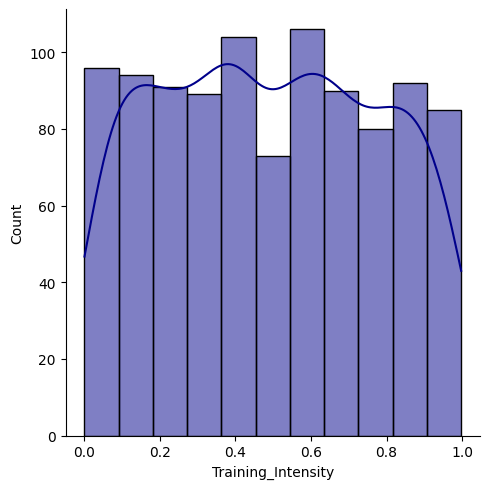

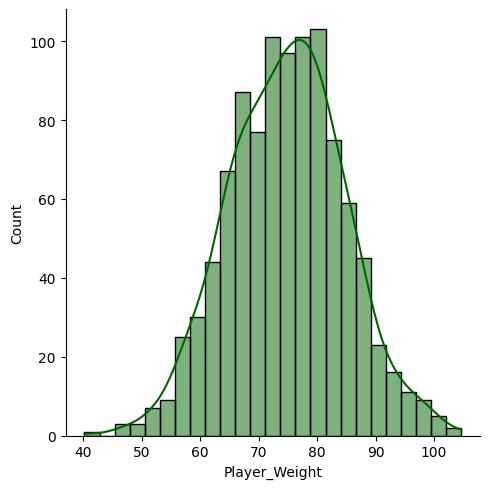

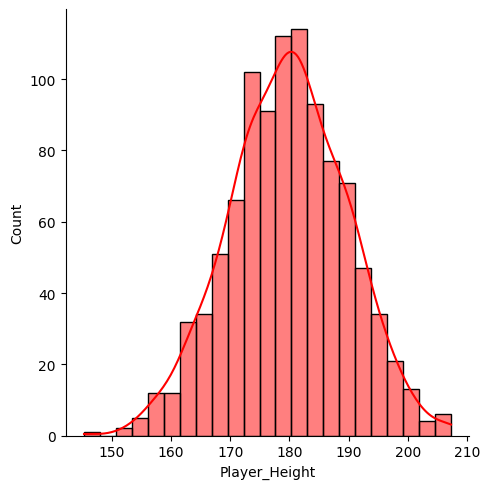

In [77]:
sns.displot(data=injury_data, x='Training_Intensity', color='darkblue', kde=True)
sns.displot(data=injury_data, x='Player_Weight', color='darkgreen', kde=True)
sns.displot(data=injury_data, x='Player_Height', color='red', kde=True)

##### The code/figures above shows that there are no outliers in the dataset and it is normally distributed.

In [78]:
injury_data['Player_BMI'] = injury_data['Player_Weight'] / (injury_data['Player_Height'] / 100) ** 2
bmi_gaps = [-float('inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_groups = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
injury_data['BMI_Group'] = pd.cut(injury_data['Player_BMI'], bins=bmi_gaps, labels=bmi_groups, right=False)

In [79]:
age_gaps = [injury_data['Player_Age'].min(), 22, 26, 30, 34, injury_data['Player_Age'].max()]
age_labels = ["18-22", "23-26", "27-30", "31-34", "35+"]
injury_data['Age_Group'] = pd.cut(injury_data['Player_Age'], bins=age_gaps, labels=age_labels, include_lowest=True)

In [80]:
injury_data.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,Player_BMI,BMI_Group,Age_Group
0,24,66.251933,175.732429,1,0.457929,5,0,21.453331,Normal,23-26
1,37,70.996271,174.581650,0,0.226522,6,1,23.293693,Normal,35+
2,32,80.093781,186.329618,0,0.613970,2,1,23.069332,Normal,31-34
3,28,87.473271,175.504240,1,0.252858,4,1,28.398810,Overweight,27-30
4,25,84.659220,190.175012,0,0.577632,1,1,23.408164,Normal,23-26
5,38,75.820549,206.631824,1,0.359209,4,0,17.757937,Underweight,35+
6,24,70.126050,177.044588,0,0.823552,2,0,22.372477,Normal,23-26
7,36,79.038206,181.523155,1,0.820696,3,1,23.986838,Normal,35+
8,28,64.086096,183.794821,1,0.477350,1,1,18.971308,Normal,27-30
9,28,66.829986,198.115048,1,0.350819,1,0,17.026933,Underweight,27-30


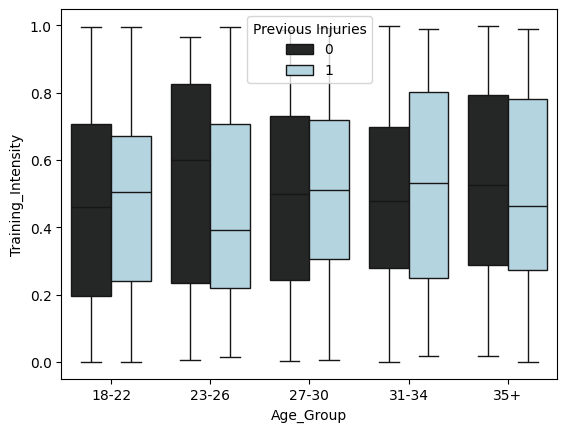

In [81]:
sns.boxplot(data=injury_data, x='Age_Group', y='Training_Intensity', hue='Previous_Injuries', palette='dark:lightblue')
plt.legend(loc='upper center', title='Previous Injuries')